In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import kstest, chisquare
from scipy.special import kolmogi

In [50]:
with open("csvs/Бабенко_Егор_Степанович.csv", "r") as csv:
    csvData = sorted(list(map(float, csv.readlines()[1:])))
N = len(csvData)
print(*csvData)

4.38373281638157e-05 6.1681969090264e-05 0.00012205190578357 0.000660948979205857 0.00113918679800425 0.00165419868890652 0.00204678264282944 0.00243319795413898 0.00305949937753626 0.00348267786269833 0.00386760015032427 0.00532653952429724 0.0065906371113643 0.0166864652969504 0.0170561472771797 0.0187069139722964 0.0250598304575393 0.027584288991634 0.0327778836759111 0.0329537530593878 0.0334782704445517 0.0373271928705907 0.0483698212832145 0.0538413756960214 0.0698236172344349 0.0918341784046112 0.0944377219225855 0.0976754267276318 0.113512144819394 0.134636087644568 0.136844212788264 0.137647360104326 0.14201108066232 0.158667301212214 0.163249927000045 0.169185412056675 0.169317430787839 0.175925778054213 0.178020836405127 0.192872961704056 0.199054627666447 0.201496512119832 0.206059449871815 0.207807570193484 0.21294305933347 0.255082777715576 0.263950222544317 0.274303002858857 0.288232988354207 0.316477072400629 0.319378022224798 0.33027334183797 0.333097482467237 0.370182

### Критерий Колмагорова
![image](https://studfile.net/html/2706/242/html_ovh47R4j6U.paDd/htmlconvd-QasmDu_html_b6262d446b8b4187.gif "Колмагоров")![image](https://studfile.net/html/2706/242/html_ovh47R4j6U.paDd/htmlconvd-QasmDu_html_8cb7542502d3b4d3.gif "Колмагоров")

![image](https://www.matematicus.ru/wp-content/uploads/2019/11/Kriterij-Kolmogorova-formula.png "Критерий Колмагорова")

Критерий Колмагорова: 2.37057
Критическое множество для критерия 0.1: 1.22385
Критическое множество для критерия 0.01: 1.62762
Критическое множество для критерия 0.001: 1.94947
Является ли данная выборка равномерным распределеннием: Нет [При критерии 0.1]


<AxesSubplot: >

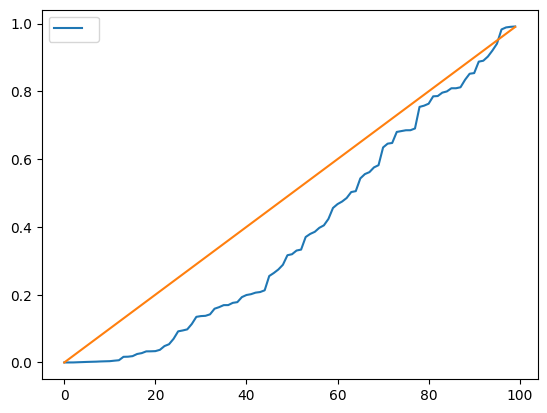

In [59]:
sup = -1
sups = []
for ind, val in enumerate(csvData):
    sup = max( abs(ind/N - val), abs(ind/N+0.01 - val), sup)
    sups.append(sup)
kolmogorov = sup*sqrt(N)
print(f"Критерий Колмагорова: {round(kolmogorov, 5)}")
print(f"Критическое множество для критерия 0.1: {round(kolmogi(0.1), 5)}")
print(f"Критическое множество для критерия 0.01: {round(kolmogi(0.01), 5)}")
print(f"Критическое множество для критерия 0.001: {round(kolmogi(0.001), 5)}")
print(f"Является ли данная выборка равномерным распределеннием: {'Да' if kolmogorov < kolmogi(0.1) else 'Нет'} [При критерии 0.1]")
pd.DataFrame(csvData, columns=['']).plot()
pd.Series([x/100 for x in range(len(csvData))]).plot()

![image](https://sun9-19.userapi.com/impf/1Ri0svWmF4xIHBaLnaoLwnnMc9C7j18QIcIeNQ/GGPLGQfqcFs.jpg?size=583x198&quality=96&sign=e3110566a59289994b8e15e9d58ccc43&type=album "Хи квадрат")

x2: 5.963730872906229


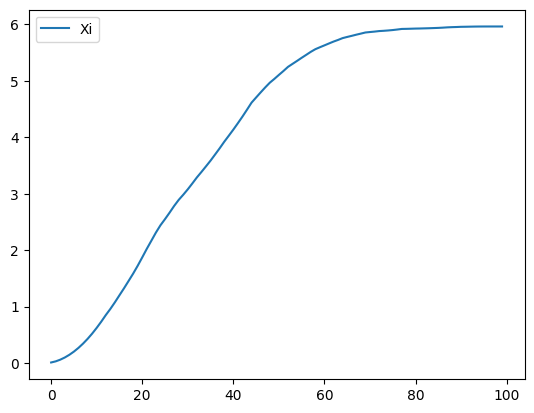

In [52]:
xi = 0
xis = []
for ind, val in enumerate(csvData):
    ind+=1
    xi += (val - ind/N)**2 / (ind/N)
    xis.append(xi)
pd.DataFrame(xis, columns=['Xi']).plot()
print(f"x2: {xi}")

In [53]:
significance_level = 0.05 #Уровень значимости

_, pvalue = kstest(csvData, [x/100 for x in range(N)])
pvalue = round(pvalue,5)
print(f"Высчитанное P-значение: {pvalue}")
if pvalue < significance_level:
    print(f"[{pvalue} < {significance_level}]: P-значение меньше")
else:
    print(f"[{pvalue} > {significance_level}]: P-значение больше")

Высчитанное P-значение: 0.00988
[0.00988 < 0.05]: P-значение меньше
